In [124]:
%pip install pandasql nltk stopwords pyLDAvis
import pandas as pd
import numpy as np
import os
import re
import pandasql as sql
from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish')

from nltk.stem.snowball import SnowballStemmer
spanishStemmer=SnowballStemmer("spanish")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
os.getcwd()
#Cambiar al directorio que contiene los datos
os.chdir(r'C:\Personal\SemestreII\AnalisisDeCasoII\Proyecto')   


Note: you may need to restart the kernel to use updated packages.


In [125]:
# Cargar Archivos csv 30 % de los  datos
# Descargar stopwors
#nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish')
from nltk.stem.snowball import SnowballStemmer
spanishStemmer=SnowballStemmer("spanish")
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#PQRD2019=pd.read_excel('Consolidado PQRD (Ene - Dic 2019).xlsx')
#PQRD2020=pd.read_excel('PQRD2019New.xlsx')



In [126]:
#os.getcwd()
#Cambiar al directorio que contiene los datos
#os.chdir(r'C:\Personal\SemestreII\AnalisisDeCasoII\Proyecto')   
# Montar unidades drive en colab
# Leer las bases de datos  se quitaron columnas antes de cargar para reducir uso de recurso de maquina
PQRD2019=pd.read_excel('PQRD2019S.xlsx')
PQRD2020=pd.read_excel('PQRD2020S.xlsx')
#df=pd.read_csv('gdrive/My Drive/data.csv')

In [17]:
#Genero una muestra para analisis inicial

Sampledata = data.sample(frac =.01) 
data =Sampledata
data
Sampledata.to_excel(r'Sampledata202.xlsx', index = False)

In [127]:
PQRD2020.columns

Index(['MES', 'PQR_CODIGO', 'PQR_CANAL', 'FECHA_CREACION', 'PET_TIPOPER',
       'AFEC_GENERO', 'AFEC_EDADR', 'AFEC_REGAFILIACION', 'AFEC_MPIO',
       'AFEC_COD_DEPTO', 'AFEC_DPTO', 'ENT_NOMBRE', 'ENT_COD_DEPTO',
       'COD_MACROMOT', 'MACROMOTIVO', 'COD_MOTGEN', 'MOTIVO_GENERAL',
       'COD_MOTESP', 'MOTIVO_ESPECIFICO', 'PATOLOGIA_1', 'PATOLOGIA_TIPO',
       'CIE_10', 'PQR_ESTADO', 'OBSERVACION', 'FECHA_RADICACION',
       'RIESGO_VIDA', 'ALTO_COSTO', 'AÑO'],
      dtype='object')

In [128]:
PQRD2019.columns

Index(['MES', 'PQR_CODIGO', 'PQR_CANAL', 'FECHA_CREACION', 'PET_TIPOPER',
       'AFEC_GENERO', 'AFEC_EDADR', 'AFEC_REGAFILIACION', 'AFEC_MPIO',
       'AFEC_COD_DEPTO', 'AFEC_DPTO', 'ENT_NOMBRE', 'ENT_COD_DEPTO',
       'COD_MACROMOT', 'MACROMOTIVO', 'COD_MOTGEN', 'MOTIVO_GENERAL',
       'COD_MOTESP', 'MOTIVO_ESPECIFICO', 'PATOLOGIA_1', 'PATOLOGIA_TIPO',
       'CIE_10', 'PQR_ESTADO', 'OBSERVACION', 'FECHA_RADICACION',
       'RIESGO_VIDA', 'ALTO_COSTO', 'AÑO'],
      dtype='object')

In [129]:
# Unir las bases de datos 2019 y 2020 
frames = [PQRD2019,PQRD2020]
data = pd.concat(frames)

In [2]:
# Registros por columna totals
#data.count()

In [3]:
# Datos Null data completa
#data_nan = data.isnull().sum()
#print(data_nan)

In [4]:
# Primeras estadisticas descriptivas
#data.describe()

## Agregar columnas preprocesadas para CIE_10, OBSERVACION,PATOLOGIA_1.MOTIVO_ESPECIFICO 

In [130]:
#Palabras CIE 10 
#Crear una nueva columna con el texto en minúscula, sin caracteres especiales ni números y sin palabras vacias
# Procesar Datos Uso funcion utilizada en clase
def pre_procesado(texto):
    texto = texto.lower()
    # Excluir los aplica / Aplica
    texto = re.sub(r"Aplica", "", texto, flags=re.I)
    texto = re.sub(r"aplica", "", texto, flags=re.I)
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto
data['preCIE_10'] = data['CIE_10'].apply(lambda texto: pre_procesado(texto))
data.head(5)

,MES,PQR_CODIGO,PQR_CANAL,FECHA_CREACION,PET_TIPOPER,AFEC_GENERO,AFEC_EDADR,AFEC_REGAFILIACION,AFEC_MPIO,AFEC_COD_DEPTO,...,PATOLOGIA_1,PATOLOGIA_TIPO,CIE_10,PQR_ESTADO,OBSERVACION,FECHA_RADICACION,RIESGO_VIDA,ALTO_COSTO,AÑO,preCIE_10
0,1,PQRD-19-0044757,Personalizado,2019-01-30,Natural,Mujer,DE 50 A 62 AÑOS,Subsidiado,NEIVA,41.0,...,ENFERMEDADES INMUNOPREVENIBLES,ATENCIÓN ENFERMEDADES INMUNOPREVENIBLES,TUMOR DE COMPORTAMIENTO INCIERTO O DESCONOCIDO...,Cerrado,"USUARIA DE 53 AñOS DE EDAD, INSCRITA A COMFAMI...",2019-01-30 12:31:49,NO,NO APLICA,2019,tumor comportamiento incierto desconocido piel
1,1,PQRD-19-0044144,Escrito,2019-01-30,Juridica,Mujer,DE 50 A 62 AÑOS,Subsidiado,SUPÍA,17.0,...,CÁNCER,OTROS,NO APLICA,Pendiente (Avance),Según archivo: Usuario solicita inicio de trat...,2019-01-30 09:19:19,SI,Quimioterapia y radioterapia para el cáncer,2019,
2,1,PQRD-19-0047620,Web,2019-01-31,Natural,Mujer,DE 6 A 12 AÑOS,Contributivo,COPACABANA,5.0,...,SALUD ORAL,SALUD ORAL,NO APLICA,Cerrado,Buenos días me dirijo a ustedes ya que desde ...,2019-01-31 18:53:47,NO,NO APLICA,2019,
3,1,PQRD-19-0047388,Web,2019-01-31,Natural,Hombre,DE 25 A 29 AÑOS,Subsidiado,"BOGOTÁ, D.C.",11.0,...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,NO APLICA,Cerrado,Cordial saludo solicito de su gran ayuda con e...,2019-01-31 16:16:09,NO,NO APLICA,2019,
4,1,PQRD-19-0045198,Personalizado,2019-01-30,Natural,Mujer,DE 38 A 49 AÑOS,Régimen Especial,CÚCUTA,54.0,...,CÁNCER,CÁNCER DE MAMA,"CARCINOMA IN SITU DE LA MAMA, PARTE NO ESPECIF...",Pendiente (Avance),"USUARIA 46 AñOS DE EDAD CON DX CA DE MAMA, REQ...",2019-01-30 14:46:20,SI,Quimioterapia y radioterapia para el cáncer,2019,carcinoma in situ mama parte especificada


In [131]:
# Con CIE10 Tenemos 30% de datos APLICA, validar con PATOLOGIA_1 y MOTIVO_ESPECIFICO
#Palabras PATOLOGIA_1 y MOTIVO_ESPECIFICO
#Crear una nueva columna con el texto en minúscula, sin caracteres especiales ni números y sin palabras vacias
# Procesar Datos Uso funcion utilizada en clase
data['prePATOLOGIA_1'] = data['PATOLOGIA_1'].apply(lambda texto: pre_procesado(texto))
data['preMOTIVO_ESPECIFICO'] = data['MOTIVO_ESPECIFICO'].apply(lambda texto: pre_procesado(texto))
data['preOBSERVACION'] = data['OBSERVACION'].apply(lambda texto: pre_procesado(texto))
data.head(5)

,MES,PQR_CODIGO,PQR_CANAL,FECHA_CREACION,PET_TIPOPER,AFEC_GENERO,AFEC_EDADR,AFEC_REGAFILIACION,AFEC_MPIO,AFEC_COD_DEPTO,...,PQR_ESTADO,OBSERVACION,FECHA_RADICACION,RIESGO_VIDA,ALTO_COSTO,AÑO,preCIE_10,prePATOLOGIA_1,preMOTIVO_ESPECIFICO,preOBSERVACION
0,1,PQRD-19-0044757,Personalizado,2019-01-30,Natural,Mujer,DE 50 A 62 AÑOS,Subsidiado,NEIVA,41.0,...,Cerrado,"USUARIA DE 53 AñOS DE EDAD, INSCRITA A COMFAMI...",2019-01-30 12:31:49,NO,NO APLICA,2019,tumor comportamiento incierto desconocido piel,enfermedades inmunoprevenibles,demora autorizacion cirugia pos,usuaria años edad inscrita comfamiliar neiva d...
1,1,PQRD-19-0044144,Escrito,2019-01-30,Juridica,Mujer,DE 50 A 62 AÑOS,Subsidiado,SUPÍA,17.0,...,Pendiente (Avance),Según archivo: Usuario solicita inicio de trat...,2019-01-30 09:19:19,SI,Quimioterapia y radioterapia para el cáncer,2019,,cáncer,falta oportunidad asignacion citas consulta me...,según archivo usuario solicita inicio tratamie...
2,1,PQRD-19-0047620,Web,2019-01-31,Natural,Mujer,DE 6 A 12 AÑOS,Contributivo,COPACABANA,5.0,...,Cerrado,Buenos días me dirijo a ustedes ya que desde ...,2019-01-31 18:53:47,NO,NO APLICA,2019,,salud oral,falta oportunidad asignacion citas consulta me...,buenos días dirijo ustedes mes diciembre vengo...
3,1,PQRD-19-0047388,Web,2019-01-31,Natural,Hombre,DE 25 A 29 AÑOS,Subsidiado,"BOGOTÁ, D.C.",11.0,...,Cerrado,Cordial saludo solicito de su gran ayuda con e...,2019-01-31 16:16:09,NO,NO APLICA,2019,,problemas relacionados facilidades atencion me...,restriccion libre escogencia eps,cordial saludo solicito gran ayuda traslado ep...
4,1,PQRD-19-0045198,Personalizado,2019-01-30,Natural,Mujer,DE 38 A 49 AÑOS,Régimen Especial,CÚCUTA,54.0,...,Pendiente (Avance),"USUARIA 46 AñOS DE EDAD CON DX CA DE MAMA, REQ...",2019-01-30 14:46:20,SI,Quimioterapia y radioterapia para el cáncer,2019,carcinoma in situ mama parte especificada,cáncer,demora autorizacion servicios alto costo cancer,usuaria años edad dx ca mama requiere entrega ...


## Revisar que los datos estén balanceados

In [132]:
data.MOTIVO_GENERAL.value_counts(normalize=True)

RESTRICCION EN EL ACCESO POR FALTA DE OPORTUNIDAD PARA LA ATENCION                          0.478589
RESTRICCION EN EL ACCESO POR DEMORAS EN LA AUTORIZACION                                     0.260590
RESTRICCION EN EL ACCESO POR FALLAS EN LA AFILIACION                                        0.041256
RESTRICCION EN LA LIBRE ESCOGENCIA                                                          0.036796
INEFICACIA EN LA ATENCION                                                                   0.034875
LIMITACIONES EN LA INFORMACION                                                              0.032907
INCUMPLIMIENTO DE LAS PRESTACIONES ECONOMICAS  (INCAPACIDADES)                              0.020662
INSATISFACCION POR PROBLEMAS DE SALUD NO RESUELTOS.                                         0.015815
RESTRICCION POR RAZONES ECONOMICA O DE CAPACIDAD DE PAGO                                    0.014035
RESTRICCION EN EL ACCESO POR NEGACION DE LA AUTORIZACION                                   

In [133]:
data.COD_MACROMOT.value_counts(normalize=True)

1     0.824828
4     0.073573
2     0.051217
5     0.038741
10    0.008417
3     0.003224
Name: COD_MACROMOT, dtype: float64

In [134]:
data.MACROMOTIVO.value_counts(normalize=True)

RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD                                                                       0.824828
INSATISFACCION DEL USUARIO CON EL PROCESO ADMINISTRATIVO                                                                0.073573
DEFICIENCIA EN LA EFECTIVIDAD DE LA ATENCION EN SALUD                                                                   0.051217
NO RECONOCIMIENTO DE LAS PRESTACIONES ECONOMICAS                                                                        0.038741
PETICIONES, QUEJAS Y RECLAMOS INTERPUESTAS POR IPS-EPS, ENTIDADES TERRITORIALES Y ORGANISMOS DE CONTROL Y VIGILANCIA    0.008417
FALTA DE DISPONIBILIDAD O INAPROPIADO MANEJO DEL RECURSOS HUMANO Y FISICO PARA LA ATENCION                              0.003224
Name: MACROMOTIVO, dtype: float64

In [135]:
data.PQR_CANAL.value_counts(normalize=True)

Web                       0.417319
Telefonico                0.284417
Personalizado             0.180496
Escrito                   0.040982
Chat                      0.033114
Correo                    0.026179
Redes Sociales            0.014524
Evento                    0.002894
Medios de Comunicación    0.000074
Name: PQR_CANAL, dtype: float64

In [136]:
data.AFEC_REGAFILIACION.value_counts(normalize=True)

Contributivo        0.642291
Subsidiado          0.285220
Régimen Especial    0.055052
Particular          0.009764
No Aplica           0.004165
PPNA                0.003508
Name: AFEC_REGAFILIACION, dtype: float64

In [137]:
data.ENT_NOMBRE.value_counts(normalize=True)

MEDIMAS EPS S.A.S.                                                              1.409701e-01
Nueva EPS S.A                                                                   1.162407e-01
COOMEVA ENTIDAD PROMOTORA DE SALUD S.A.                                         8.674986e-02
SALUD TOTAL ENTIDAD PROMOTORA DE SALUD                                          7.202302e-02
FAMISANAR  LTDA.  CAFAM - COLSUBSIDIO E.P.S.                                    6.044039e-02
                                                                                    ...     
SERVICIO DE SALUD INMEDIATO MEDICINA PREPAGADA S.A.                             2.276760e-06
ASISTENCIA MEDICA SAS SERVICIO DE AMBULANCIA PREPAGADO                          2.276760e-06
CAJA DE COMPENSACIÓN FAMILIAR DE BOYACÁ “COMFABOY”                              2.276760e-06
CAJA DE PREVISION SOCIAL DE LA UNIVERSIDAD INDUSTRIAL DE SANTANDER - CAPRUIS    2.276760e-06
FONDO DE SEGURIDAD SOCIAL EN SALUD UNIVERSIDAD DE NARIÑO              

In [138]:
data.PQR_ESTADO.value_counts(normalize=True)

Respuesta por la entidad    0.492678
Cerrado                     0.255984
Pendiente (Avance)          0.187086
Casos para instruccion      0.058120
REABIERTO                   0.006132
Name: PQR_ESTADO, dtype: float64

In [139]:
data.AFEC_EDADR.value_counts(normalize=True)

Mayor de 63 Años    0.180318
De 50 A 62 Años     0.124045
Mayor de 63 AÑOS    0.108085
De 38 A 49 Años     0.092278
DE 50 A 62 AÑOS     0.088233
DE 38 A 49 AÑOS     0.068122
De 30 A 37 Años     0.061652
DE 30 A 37 AÑOS     0.043576
De 25 A 29 Años     0.036861
De 18 A 24 Años     0.031777
DE 25 A 29 AÑOS     0.025408
De 0 A 5 Años       0.024692
DE 0 A 5 AÑOS       0.022604
DE 18 A 24 AÑOS     0.022459
De 6 A 12 Años      0.021061
DE 6 A 12 AÑOS      0.017914
De 13 A 17 Años     0.015886
DE 13 A 17 AÑOS     0.012190
No Aplica           0.002838
Name: AFEC_EDADR, dtype: float64

In [140]:
pd.crosstab(data['PATOLOGIA_1'], data['RIESGO_VIDA'],)

RIESGO_VIDA,NO,SI
PATOLOGIA_1,,
CUIDADO INTENSIVO PARA CUALQUIER PATOLOGÍA,712,513
CÁNCER,6527,96640
EFECTIVIDAD GLOBAL DE LA ATENCIÓN,82,103
ENFERMEDAD CRÓNICA TRANSMISIBLE,60,182
ENFERMEDAD TRANSMITIDA POR VECTORES,131,336
ENFERMEDADES CRÓNICAS NO TRANSMISIBLES RESPIRATORIAS,6053,68760
ENFERMEDADES CRÓNICAS NO TRANSMISIBLES –DIABETES,15099,32691
ENFERMEDADES CRÓNICAS NO TRANSMISIBLES –RENALES,2719,12944
ENFERMEDADES CRÓNICAS NO TRANSMISIBLES- FACTORES DE RIESGO,2965,1015


In [141]:
pd.crosstab(data['AFEC_REGAFILIACION'], data['RIESGO_VIDA'],)

RIESGO_VIDA,NO,SI
AFEC_REGAFILIACION,,
Contributivo,493716,352607
No Aplica,4702,786
PPNA,2537,2085
Particular,9850,3016
Régimen Especial,45922,26618
Subsidiado,206320,169503


In [142]:
pd.crosstab(data['AFEC_EDADR'], data['RIESGO_VIDA'],)

RIESGO_VIDA,NO,SI
AFEC_EDADR,,
DE 0 A 5 AÑOS,19592,10192
DE 13 A 17 AÑOS,10262,5800
DE 18 A 24 AÑOS,21102,8492
DE 25 A 29 AÑOS,25208,8271
DE 30 A 37 AÑOS,42713,14706
DE 38 A 49 AÑOS,63890,25872
DE 50 A 62 AÑOS,74308,41953
DE 6 A 12 AÑOS,16040,7565
De 0 A 5 Años,18887,13649


In [143]:
data.RIESGO_VIDA.value_counts(normalize=True)

NO    0.579092
SI    0.420908
Name: RIESGO_VIDA, dtype: float64

# Top Palabras

In [144]:
# Top de Palabras prePATOLOGIA_1
import collections
c = collections.Counter(data['prePATOLOGIA_1'].values)
print('Top 10:')
for word, count in c.most_common(10):
    print('%s: %7d' % (word, count))

Top 10:
problemas relacionados facilidades atencion medica u servicios salud:  771616
cáncer:  103167
enfermedades crónicas trasmisibles cardiovasculares:  102385
enfermedades crónicas transmisibles respiratorias:   74813
enfermedades osteoarticulares:   49470
enfermedades crónicas transmisibles diabetes:   47790
materno infantil:   36546
:   31272
salud mental:   28545
enfermedades huérfanas:   20934


In [145]:
# Top de Palabras preMOTIVO_ESPECIFICO
import collections
c = collections.Counter(data['preMOTIVO_ESPECIFICO'].values)
print('Top 10:')
for word, count in c.most_common(10):
    print('%s: %7d' % (word, count))

Top 10:
falta oportunidad asignacion citas consulta medica especializada especialidades medicas:  241697
falta oportunidad entrega medicamentos pos:  176076
demora autorizacion medicamentos pos:   61353
demora autorizacion examenes laboratorio diagnosticos:   43198
falta oportunidad prestacion servicios imagenologia segundo tercer nivel:   37539
demora referencia contrarreferencia:   36268
restriccion libre escogencia eps:   35772
demora programacion examenes laboratorio diagnosticos:   33336
falta oportunidad programacion cirugia:   32304
demora autorizacion consultas medicas especializada:   31927


In [146]:
# Top de Palabraas OBSERVACION
import collections
c = collections.Counter(data['preOBSERVACION'].values)
print('Top 10:')
for word, count in c.most_common(10):
    print('%s: %7d' % (word, count))

Top 10:
según adjunto usuario requiere pago incapacidades adjunta archivo:     148
según adjunto usuario requiere cita medicina general odontología adjunta archivo:     146
según archivo adjunto solicita suministro medicamentos insumos reconocimiento viáticos:     138
según archivo usuario requiere autorización programación mamografia adjunta solicitud:     125
según adjunto usuario requiere reconocimiento pago incapacidades adjunta archivo:     112
según adjunto ips manifiesta dado situación urgencia presentada paciente superada ubicado hospitalización eps deberá garantizar tratamiento ordenado adjunta archivo:     111
correosisco cm solicitud general usuarios pertenecen regimen subsidiado solicitan ser retirados eps sura señores superintendencia nacional salud amp bogotá d c asunto pqr intervención superslaud eps sura medio presente documento permito dar conocer eps sura vulnerando derechos permanecer régimen salud subsidiado usuarios municipio chía cundinamarca cuales ministerio sal

In [147]:
#Cuántas palabras hay en el vocabulario? (Usando la función de sklearn)
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow_rep = count_vect.fit_transform(data['preOBSERVACION'].values)
len(count_vect.vocabulary_)

574070

In [148]:
# Top de Palabraas
import collections
c = collections.Counter(data['preMOTIVO_ESPECIFICO'].values)
print('Top 10:')
data1 = []
for word, count in c.most_common(10):
    data1.append([word,count])
   # print('%s: %7d' % (word, count))
df = pd.DataFrame(data1)
df.columns =['preMOTIVO_ESPECIFICO', 'Count']
df

Top 10:


,preMOTIVO_ESPECIFICO,Count
0,falta oportunidad asignacion citas consulta me...,241697
1,falta oportunidad entrega medicamentos pos,176076
2,demora autorizacion medicamentos pos,61353
3,demora autorizacion examenes laboratorio diagn...,43198
4,falta oportunidad prestacion servicios imageno...,37539
5,demora referencia contrarreferencia,36268
6,restriccion libre escogencia eps,35772
7,demora programacion examenes laboratorio diagn...,33336
8,falta oportunidad programacion cirugia,32304
9,demora autorizacion consultas medicas especial...,31927


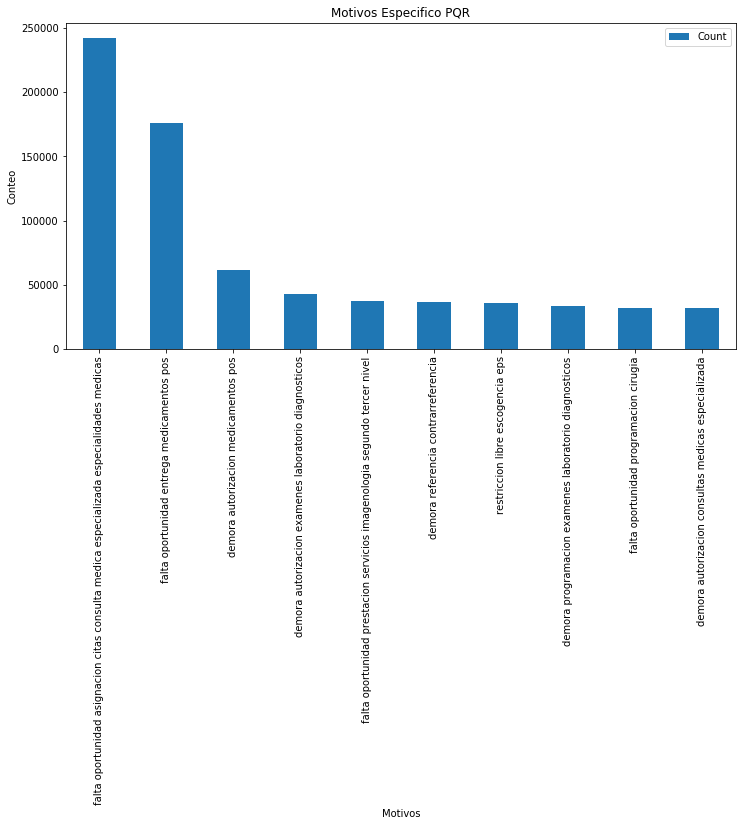

In [149]:
df['Count'] = pd.to_numeric(df['Count'])
ax = df.plot(kind='bar', y='Count',x='preMOTIVO_ESPECIFICO', figsize=(12,6))
ax.set_title('Motivos Especifico PQR')
ax.set_xlabel('Motivos')
ax.set_ylabel('Conteo')
ax.figsize=(25, 10)

# Test de Modelos 
### Basado en los ejecrcicios y aprendizaje clase NLP

In [150]:
# Cuenatos Documentos Tenemos 

print(f"Tenemos {data.shape[0]:,d} documentos.")
data.head(5)

Tenemos 1,317,662 documentos.


,MES,PQR_CODIGO,PQR_CANAL,FECHA_CREACION,PET_TIPOPER,AFEC_GENERO,AFEC_EDADR,AFEC_REGAFILIACION,AFEC_MPIO,AFEC_COD_DEPTO,...,PQR_ESTADO,OBSERVACION,FECHA_RADICACION,RIESGO_VIDA,ALTO_COSTO,AÑO,preCIE_10,prePATOLOGIA_1,preMOTIVO_ESPECIFICO,preOBSERVACION
0,1,PQRD-19-0044757,Personalizado,2019-01-30,Natural,Mujer,DE 50 A 62 AÑOS,Subsidiado,NEIVA,41.0,...,Cerrado,"USUARIA DE 53 AñOS DE EDAD, INSCRITA A COMFAMI...",2019-01-30 12:31:49,NO,NO APLICA,2019,tumor comportamiento incierto desconocido piel,enfermedades inmunoprevenibles,demora autorizacion cirugia pos,usuaria años edad inscrita comfamiliar neiva d...
1,1,PQRD-19-0044144,Escrito,2019-01-30,Juridica,Mujer,DE 50 A 62 AÑOS,Subsidiado,SUPÍA,17.0,...,Pendiente (Avance),Según archivo: Usuario solicita inicio de trat...,2019-01-30 09:19:19,SI,Quimioterapia y radioterapia para el cáncer,2019,,cáncer,falta oportunidad asignacion citas consulta me...,según archivo usuario solicita inicio tratamie...
2,1,PQRD-19-0047620,Web,2019-01-31,Natural,Mujer,DE 6 A 12 AÑOS,Contributivo,COPACABANA,5.0,...,Cerrado,Buenos días me dirijo a ustedes ya que desde ...,2019-01-31 18:53:47,NO,NO APLICA,2019,,salud oral,falta oportunidad asignacion citas consulta me...,buenos días dirijo ustedes mes diciembre vengo...
3,1,PQRD-19-0047388,Web,2019-01-31,Natural,Hombre,DE 25 A 29 AÑOS,Subsidiado,"BOGOTÁ, D.C.",11.0,...,Cerrado,Cordial saludo solicito de su gran ayuda con e...,2019-01-31 16:16:09,NO,NO APLICA,2019,,problemas relacionados facilidades atencion me...,restriccion libre escogencia eps,cordial saludo solicito gran ayuda traslado ep...
4,1,PQRD-19-0045198,Personalizado,2019-01-30,Natural,Mujer,DE 38 A 49 AÑOS,Régimen Especial,CÚCUTA,54.0,...,Pendiente (Avance),"USUARIA 46 AñOS DE EDAD CON DX CA DE MAMA, REQ...",2019-01-30 14:46:20,SI,Quimioterapia y radioterapia para el cáncer,2019,carcinoma in situ mama parte especificada,cáncer,demora autorizacion servicios alto costo cancer,usuaria años edad dx ca mama requiere entrega ...


### Feature Engineering

In [151]:
import re

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

In [152]:
# Funcion de recibida en la clase NLP
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    return texto

 #PP columna con datos limpios preprocesaros, la columna objetivo es 
data['PP'] = data['OBSERVACION'].apply(lambda texto: pre_procesado(texto))

data.head(5)

,MES,PQR_CODIGO,PQR_CANAL,FECHA_CREACION,PET_TIPOPER,AFEC_GENERO,AFEC_EDADR,AFEC_REGAFILIACION,AFEC_MPIO,AFEC_COD_DEPTO,...,OBSERVACION,FECHA_RADICACION,RIESGO_VIDA,ALTO_COSTO,AÑO,preCIE_10,prePATOLOGIA_1,preMOTIVO_ESPECIFICO,preOBSERVACION,PP
0,1,PQRD-19-0044757,Personalizado,2019-01-30,Natural,Mujer,DE 50 A 62 AÑOS,Subsidiado,NEIVA,41.0,...,"USUARIA DE 53 AñOS DE EDAD, INSCRITA A COMFAMI...",2019-01-30 12:31:49,NO,NO APLICA,2019,tumor comportamiento incierto desconocido piel,enfermedades inmunoprevenibles,demora autorizacion cirugia pos,usuaria años edad inscrita comfamiliar neiva d...,"[usuaria, años, edad, inscrita, comfamiliar, n..."
1,1,PQRD-19-0044144,Escrito,2019-01-30,Juridica,Mujer,DE 50 A 62 AÑOS,Subsidiado,SUPÍA,17.0,...,Según archivo: Usuario solicita inicio de trat...,2019-01-30 09:19:19,SI,Quimioterapia y radioterapia para el cáncer,2019,,cáncer,falta oportunidad asignacion citas consulta me...,según archivo usuario solicita inicio tratamie...,"[según, archivo, usuario, solicita, inicio, tr..."
2,1,PQRD-19-0047620,Web,2019-01-31,Natural,Mujer,DE 6 A 12 AÑOS,Contributivo,COPACABANA,5.0,...,Buenos días me dirijo a ustedes ya que desde ...,2019-01-31 18:53:47,NO,NO APLICA,2019,,salud oral,falta oportunidad asignacion citas consulta me...,buenos días dirijo ustedes mes diciembre vengo...,"[buenos, días, dirijo, ustedes, mes, diciembre..."
3,1,PQRD-19-0047388,Web,2019-01-31,Natural,Hombre,DE 25 A 29 AÑOS,Subsidiado,"BOGOTÁ, D.C.",11.0,...,Cordial saludo solicito de su gran ayuda con e...,2019-01-31 16:16:09,NO,NO APLICA,2019,,problemas relacionados facilidades atencion me...,restriccion libre escogencia eps,cordial saludo solicito gran ayuda traslado ep...,"[cordial, saludo, solicito, gran, ayuda, trasl..."
4,1,PQRD-19-0045198,Personalizado,2019-01-30,Natural,Mujer,DE 38 A 49 AÑOS,Régimen Especial,CÚCUTA,54.0,...,"USUARIA 46 AñOS DE EDAD CON DX CA DE MAMA, REQ...",2019-01-30 14:46:20,SI,Quimioterapia y radioterapia para el cáncer,2019,carcinoma in situ mama parte especificada,cáncer,demora autorizacion servicios alto costo cancer,usuaria años edad dx ca mama requiere entrega ...,"[usuaria, años, edad, dx, ca, mama, requiere, ..."


# Entrenar el modelo

In [153]:
# Librerias 
import pyLDAvis.gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from pprint import pprint
import re
from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

C:\Users\Jesus\Anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping
C:\Users\Jesus\Anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [154]:
# Crear una representación de los documentos en forma de diccionario
dictionary = Dictionary(data['PP'].values)

# Filtrar palabras muy frecuentes o infrecuentes
dictionary.filter_extremes(no_below=5, no_above=0.5)
    
corpus = [dictionary.doc2bow(text) for text in data['PP'].values]

# Train the topic model
model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=7, passes=50)

##  Resultados

In [156]:
lda_display = pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)
pyLDAvis.save_html(lda_display, 'C:/Users/Jesus/ldaProyecto.html')

In [157]:
# Imprimir temas
model.print_topics(num_words=10)

[(0,
  '0.025*"salud" + 0.022*"s" + 0.012*"cc" + 0.011*"contributivo" + 0.010*"c" + 0.010*"activo" + 0.008*"entidad" + 0.007*"pago" + 0.007*"correo" + 0.007*"com"'),
 (1,
  '0.039*"covid" + 0.017*"paciente" + 0.014*"salud" + 0.010*"prueba" + 0.008*"quot" + 0.007*"cuanto" + 0.007*"atención" + 0.006*"síntomas" + 0.006*"tratamiento" + 0.006*"parte"'),
 (2,
  '0.090*"entrega" + 0.046*"medicamentos" + 0.043*"mg" + 0.035*"medicamento" + 0.026*"mes" + 0.019*"farmacia" + 0.019*"posible" + 0.018*"tiempo" + 0.017*"menor" + 0.016*"solicita"'),
 (3,
  '0.015*"dia" + 0.015*"cita" + 0.009*"mas" + 0.008*"agosto" + 0.008*"julio" + 0.007*"respuesta" + 0.007*"dias" + 0.007*"prueba" + 0.007*"medico" + 0.007*"salud"'),
 (4,
  '0.044*"usuario" + 0.033*"activo" + 0.033*"vigente" + 0.032*"normatividad" + 0.030*"s" + 0.030*"requiere" + 0.029*"validación" + 0.028*"envía" + 0.027*"acuerdo" + 0.027*"gestión"'),
 (5,
  '0.028*"resolución" + 0.025*"régimen" + 0.024*"ley" + 0.021*"artículo" + 0.019*"salud" + 0.017*

In [158]:
d = dictionary.doc2bow(["diabetes", "maligno", "incapacidad","covid"])
topics = model.get_document_topics(d, per_word_topics=True)
topics

([(0, 0.028619837),
  (1, 0.25436935),
  (2, 0.028818388),
  (3, 0.028628714),
  (4, 0.60192686),
  (5, 0.028896166),
  (6, 0.028740669)],
 [(480, [4, 1]), (878, [4]), (3138, [4]), (98932, [1])],
 [(480, [(1, 0.13148463), (4, 0.8663845)]),
  (878, [(4, 0.99744385)]),
  (3138, [(4, 0.99953896)]),
  (98932, [(1, 0.9970011)])])

In [159]:
dictionary.token2id['covid']

98932

In [160]:
def get_doc_top_n(text_processed, n):
    d = dictionary.doc2bow(text_processed)
    topics = dict(model.get_document_topics(d))
    try:
        return topic[n]
    except:
        return None

In [161]:
for t in range(0,7):
    top_name = f"topic_{t}"
    data[top_name] = data['PP'].apply(lambda doc: get_doc_top_n(doc, t))

# Escoger K  usando el método del codo

In [9]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [15]:
# Sample = data.sample(frac =.10) 

In [18]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect.fit_transform(data.preMOTIVO_ESPECIFICO.values)


In [19]:
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect.get_feature_names())
# SamplePQRD20202 = PQRD2020.sample(frac =.30) 

In [58]:
# Completa 
data.preOBSERVACION

0         usuaria años edad inscrita comfamiliar neiva d...
1         según archivo usuario solicita inicio tratamie...
2         buenos días dirijo ustedes mes diciembre vengo...
3         cordial saludo solicito gran ayuda traslado ep...
4         usuaria años edad dx ca mama requiere entrega ...
                                ...                        
564670    grst fernandaborraez usuaria años según adres ...
564671    ivrnal usuario años según adres activo eps sur...
564672    correosisl usuario años según adres activo eps...
564673    chat usuario días nacido hijo yina paola serna...
564674    ivrbog usuario años según adres activo eps sur...
Name: preOBSERVACION, Length: 1317662, dtype: object

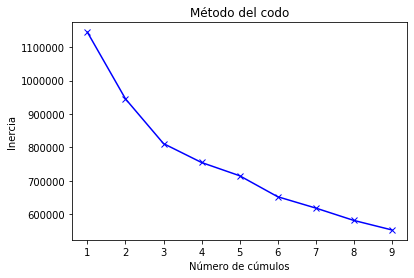

In [20]:
ks = []
kinertia = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    ks.append(k)
    kinertia.append(kmeans.inertia_)
    
plt.xlabel("Número de cúmulos"); 
plt.ylabel("Inercia");
plt.title('Método del codo')
plt.plot(ks,kinertia, 'bx-');

In [21]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [22]:
k_pt = 3
model = KMeans(n_clusters=k_pt)
model.fit(tfidf_matrix)
nbrs = NearestNeighbors(n_neighbors=3, metric='euclidean').fit(tfidf_matrix.values)

data['cluster'] = model.labels_
clust_cnt = data['cluster'].value_counts()
clust_cnt_pct = data['cluster'].value_counts(normalize=True)

print(f"{color.BOLD}CLUSTERS:\n{color.END}")
centroids = model.cluster_centers_
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vect.get_feature_names()

for i in range(k_pt):
    print(f"{color.BLUE}Cluster {i}:{color.END}")
    print(f"{color.CYAN}COUNT {color.END} {clust_cnt[i]} comments ({clust_cnt_pct[i]:.2%} of the data)")
    print(f"{color.CYAN}TERMS {color.END}", end=" ")
    for ind in order_centroids[i, :20]:
        print(f'{color.BOLD}{terms[ind]}{color.END}', end=" "),
    print(f"\n{color.CYAN}REPRESENTATIVE COMMENTS{color.END}")
    for comment in data.iloc[nbrs.kneighbors([centroids[i]])[1][0]]['preOBSERVACION'].values:
        print(f"* {comment}")
    print("\n")

CLUSTERS:

Cluster 0:
COUNT  830400 comments (63.02% of the data)
TERMS  demora autorizacion pos laboratorio cirugia programacion diagnosticos examenes medicamentos servicios falta oportunidad prestacion referencia contrarreferencia consultas restriccion libre escogencia eps 
REPRESENTATIVE COMMENTS
* ivrnal usuaria años según usuario activo entidad magisterio red vital sumí medical diagnóstico hipertensión pulmonar severa epoc lupus eritematoso parkinson requiere autorización bosentan mg sildenafil mg radicó solicitud mes julio fecha recibido respuesta autorización usuario manifiesta indican pendiente autorización manifiesta requiere cuanto solución parte entidad paciente lleva bastante tiempo medicamento manifiesta deben mes agosto usuario requiere pronta solución parte entidad usuario manifiesta si llega pasar paciente hace responsable entidad pura negligencia entrega medicamentos envía validación gestión acuerdo normatividad vigente
* chat efectivo usuario años según adres activo n

# Modelo

# Para preOBSERVACION -- preMACROMOTIVO

In [28]:
# 3. Feature Engineering (Pre-procesamiento, TF-IDF, etc...)
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)

In [30]:
X_train = tfidf_vect.fit_transform(train.preOBSERVACION.values)
y_train = train.MACROMOTIVO.values

X_test = tfidf_vect.transform(test.preOBSERVACION.values)
y_test = test.MACROMOTIVO.values

In [31]:
# 4. Entrenar el modelo
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [32]:
# Inicializamos los clasificadores
nb = MultinomialNB()
logreg = LogisticRegression(class_weight="balanced")
svm = LinearSVC(class_weight='balanced')

In [33]:
# Entrenamos los modelos
nb.fit(X_train, y_train)
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train);

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [34]:
# 5. Obtener medidas de rendimiento en el conjunto de datos de prueba y mejorar modelo
# Hacemos las predicciones para los datos de prueba (test)
y_pred_nb = nb.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

### Exactitud

In [17]:
print(f"Naive Bayes: {accuracy_score(y_test, y_pred_nb):>15.2f}")
print(f"Regresión Logística: {accuracy_score(y_test, y_pred_logreg):>7.2f}")
print(f"SVM: {accuracy_score(y_test, y_pred_svm):>23.2f}")

Naive Bayes:            0.84
Regresión Logística:    0.61
SVM:                    0.88


###  Otras métricas

In [18]:
metricas = [precision_score, recall_score, f1_score]

for metrica in metricas:
    print(metrica.__name__)
    print(f"Naive Bayes: {metrica(y_test, y_pred_nb,average='micro'):>15.2f}")
    print(f"Regresión Logística: {metrica(y_test, y_pred_logreg,average='micro'):>7.2f}")
    print(f"SVM: {metrica(y_test, y_pred_svm,average='micro'):>23.2f}")
    print()

precision_score
Naive Bayes:            0.84
Regresión Logística:    0.61
SVM:                    0.88

recall_score
Naive Bayes:            0.84
Regresión Logística:    0.61
SVM:                    0.88

f1_score
Naive Bayes:            0.84
Regresión Logística:    0.61
SVM:                    0.88



In [19]:
print("Naive Bayes")
print(classification_report(y_test, y_pred_nb))
print()
print("Regresión Logística")
print(classification_report(y_test, y_pred_logreg))
print()
print("SVM")
print(classification_report(y_test, y_pred_svm))

Naive Bayes


C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                                                                      precision    recall  f1-score   support

                                                               DEFICIENCIA EN LA EFECTIVIDAD DE LA ATENCION EN SALUD       0.60      0.00      0.00     53893
                          FALTA DE DISPONIBILIDAD O INAPROPIADO MANEJO DEL RECURSOS HUMANO Y FISICO PARA LA ATENCION       0.00      0.00      0.00      3405
                                                           INSATISFACCION DEL USUARIO CON EL PROCESO ADMINISTRATIVO        0.80      0.06      0.11     77431
                                                                    NO RECONOCIMIENTO DE LAS PRESTACIONES ECONOMICAS       0.97      0.23      0.37     40966
PETICIONES, QUEJAS Y RECLAMOS INTERPUESTAS POR IPS-EPS, ENTIDADES TERRITORIALES Y ORGANISMOS DE CONTROL Y VIGILANCIA       0.00      0.00      0.00      8964
                                                   

In [20]:
print("Naive Bayes")
print(confusion_matrix(y_test, y_pred_nb))
print()
print("Regresión Logística")
print(confusion_matrix(y_test, y_pred_logreg))
print()
print("SVM")
print(confusion_matrix(y_test, y_pred_svm))

Naive Bayes
[[   135      0     30     96      0  53632]
 [     5      0      2      0      0   3398]
 [    16      0   4757     58      0  72600]
 [     3      0     10   9405      0  31548]
 [     1      0     10      5      0   8948]
 [    66      0   1149    113      0 868142]]

Regresión Logística
[[ 30782   3083   4393   1785   5165   8685]
 [    52   3141     22      7    118     65]
 [  7912   1637  53839   1666   2619   9758]
 [  1333     97    558  38006    314    658]
 [   785    242    377     80   6697    783]
 [128564  27094  96094  13841  94967 508910]]

SVM
[[ 33856    287   1504   1130    977  16139]
 [     5   3323      1      3      8     65]
 [  3065    204  55578   1006    711  16867]
 [   158     10     49  40061     29    659]
 [    89     29    115     26   7267   1438]
 [ 27541   1765  32460   6131   9373 792200]]


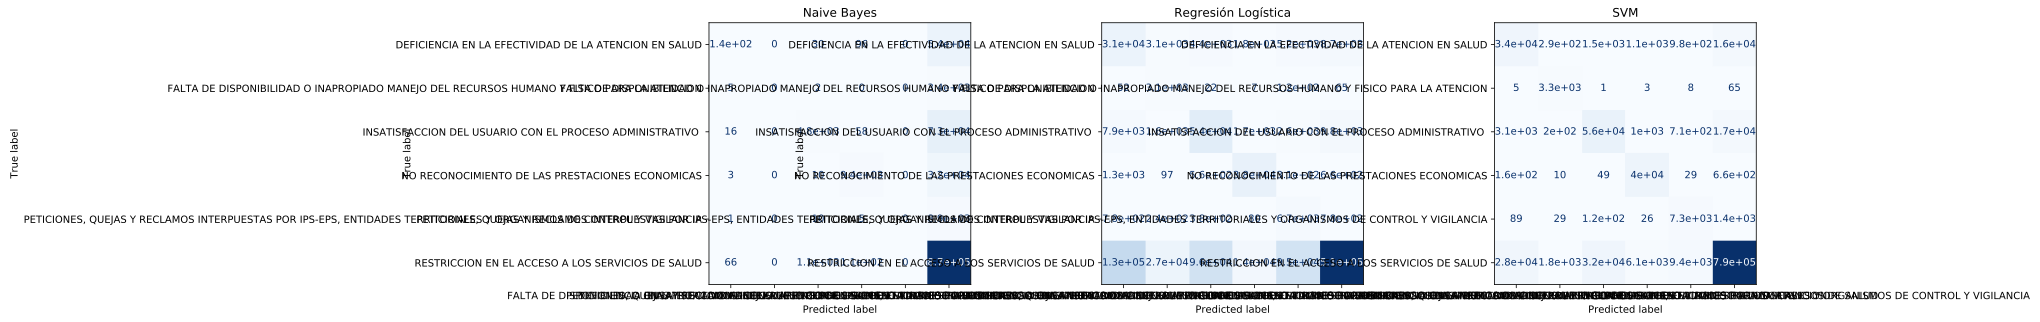

In [21]:
%config InlineBackend.figure_format = 'svg'

fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(1,3,1)
plot_confusion_matrix(nb, X_test, y_test, cmap = 'Blues', ax=ax1).im_.colorbar.remove()
plt.title("Naive Bayes")

ax2 = fig.add_subplot(1,3,2)
plot_confusion_matrix(logreg, X_test, y_test, cmap = 'Blues', ax=ax2).im_.colorbar.remove()
plt.title("Regresión Logística")

ax3 = fig.add_subplot(1,3,3)
plot_confusion_matrix(svm, X_test, y_test, cmap = 'Blues', ax=ax3).im_.colorbar.remove() # normalize='true'
plt.title("SVM");

# Analisis de Sentimiento Observaciones 

In [70]:
from googletrans import Translator
import pandas as pd

In [74]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()
translator = Translator()

In [92]:
from flair.models import TextClassifier
from flair.data import Sentence


C:\Users\Jesus\Anaconda3\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [94]:
classifier = TextClassifier.load('sentiment')

def sent_flair(texto):
    sentence = Sentence(texto)
    classifier.predict(sentence)
    result = sentence.labels[0]
    label = result.value
    score = result.score
    if label == 'POSITIVE':
        return score
    if label == 'NEGATIVE':
        return -1 * score
    return score

test['sent_flair'] = test['preOBSERVACION'].apply(lambda valor: sent_flair(valor))
test.head()

2020-11-27 19:13:20,726 loading file C:\Users\Jesus\.flair\models\sentiment-en-mix-distillbert_3.1.pt


C:\Users\Jesus\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,MES,PQR_CODIGO,PQR_CANAL,FECHA_CREACION,PET_TIPOPER,AFEC_GENERO,AFEC_EDADR,AFEC_REGAFILIACION,AFEC_MPIO,AFEC_COD_DEPTO,...,PP,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,PPC,sent_flair
481334,7,PQRD-20-0618838,Correo,2020-07-18,Natural,MUJER,Mayor de 63 Años,Régimen Especial,AGRADO,41.0,...,"[cmag, ordial, saludo, medio, presente, correo...",None,None,None,None,None,None,None,"[cmag, ordial, saludo, medio, presente, correo...",0.982882
567685,10,PQRD-19-0647154,Web,2019-10-07,Natural,MUJER,De 50 A 62 Años,Contributivo,"BOGOTÁ, D.C.",11.0,...,"[buenas, tardes, descontento, atencion, co, mp...",None,None,None,None,None,None,None,"[buenas, tardes, descontento, atencion, co, mp...",-0.955244
134541,3,PQRD-19-0159020,Web,2019-03-22,Natural,Hombre,DE 50 A 62 AÑOS,Régimen Especial,"BOGOTÁ, D.C.",11.0,...,"[josé, edilberto, delgado, sotelo, cc, años, r...",None,None,None,None,None,None,None,"[josé, edilberto, delgado, sotelo, cc, años, r...",0.988204
255093,4,PQRD-20-0341962,Correo,2020-04-24,Natural,HOMBRE,De 18 A 24 Años,Régimen Especial,"BOGOTÁ, D.C.",11.0,...,"[correosns, minsalud, cuenta, día, marzo, alle...",None,None,None,None,None,None,None,"[correosns, minsalud, cuenta, día, marzo, alle...",0.974851
436705,8,PQRD-19-0517756,Web,2019-08-18,Natural,Hombre,Mayor de 63 AÑOS,Subsidiado,FACATATIVÁ,25.0,...,"[buenos, dias, dirijo, ustedes, cita, cardialg...",None,None,None,None,None,None,None,"[buenos, dias, dirijo, ustedes, cita, cardialg...",0.998203


In [97]:
test[['preOBSERVACION', 'sent_flair']].sort_values('sent_flair')

,preOBSERVACION,sent_flair
378192,dia sabado julio encontraba hospitalizado espe...,-0.999995
719944,quot lunes dicembre tube cita doctora monteneg...,-0.999991
296732,correosns s internacion servicio complejidad a...,-0.999986
65522,paciente cancer dia febrero encuentra estudio ...,-0.999981
82557,adres actualización mediante fallo tutela fech...,-0.999978
...,...,...
619522,correosns minsalud octubre realizado varias ll...,0.999828
70166,correosns anexo hc pacte barrero briñez andres...,0.999829
197448,paciente jinny antonela pava cardenas rc afili...,0.999836
238997,paciente rc alejandra fonseca rodriguez respue...,0.999852


In [98]:
#¿Cuál es el preOBSERVACION más positivo?
test.loc[619522]['preOBSERVACION']

'correosns minsalud octubre realizado varias llamadas call center asignación citas alnumero clínica nogales solicitar urgentemente cita extraconsulta primera vez especialista endocrinología aun notengo respuesta parte eps clínica siempre respuesta agenda hoy acerque clínica nogales ayudaran cita respuestafue solo prioridad personas plan complementario consalud total solicita amablemente personal clínica cuentacomo cita urgente exponiendo caso aun asi negó brindarme ayuda muchasveces llamado directamente clínica ayudado citas médicasextras facilitado procedimiento llevó paciente prioritaria diagnóstico médico debo hacerme urgencia elprocedimiento posquirúrgico tres cirugías hecho año losespecialistas deben verificar salud hace varios meses diagnosticaroncáncer seno area oncologia cancer tiroides especialidad cabeza ycuello necesitamos procedimiento posquirúrgico avance'

In [100]:
#¿Cuál es el tuit más negativo?
test.loc[378192]['preOBSERVACION']

'dia sabado julio encontraba hospitalizado espera autorizacion parte coomeva remision alguna hospital convenio realizarme endoscopia calculos requieren saber operarme dieron autorizacion decidi salir ir zipaquira alla tampoco atendieron convenio hospital san jose cardioinfantil meredi ninguno atendido misma razo verdad dolor consumo vomito'

In [107]:
test['label'] = 0
test.loc[test['sent_flair'] > 0, 'label'] = 1
test.loc[test['sent_flair'] < -0, 'label'] = -1
test['label']

C:\Users\Jesus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Jesus\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Jesus\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

481334    1
567685   -1
134541    1
255093    1
436705    1
         ..
20222     1
149741    1
291937    1
284468    1
601793    1
Name: label, Length: 52707, dtype: int64

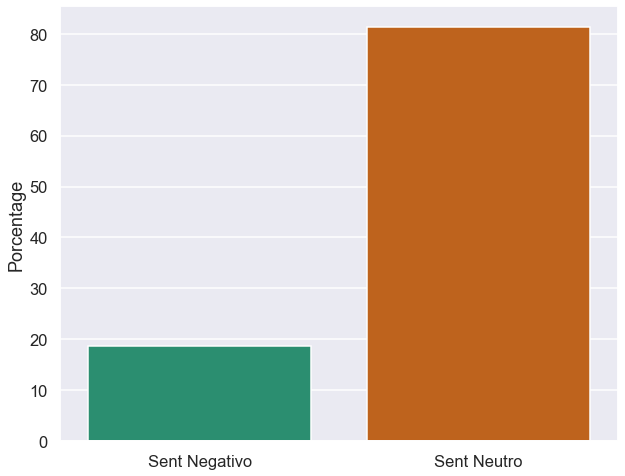

In [110]:
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
fig, ax = plt.subplots(figsize=(10, 8))

counts = test.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Sent Negativo', 'Sent Neutro', 'Sent Positivo'])
ax.set_ylabel("Porcentage")

plt.show()